<a href="https://colab.research.google.com/github/nishchaysingla/Deep_learning_learning/blob/main/early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [3]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

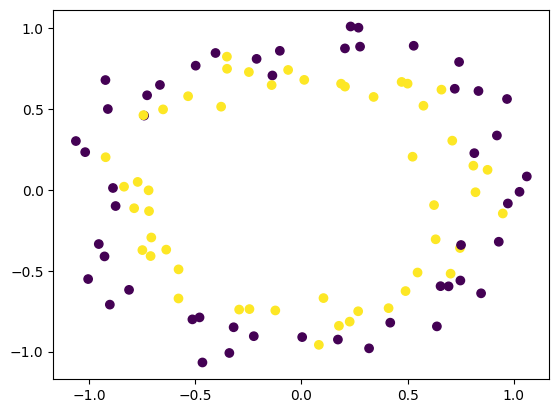

In [8]:
plt.scatter(X[:,0],X[:,1],c=y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [10]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

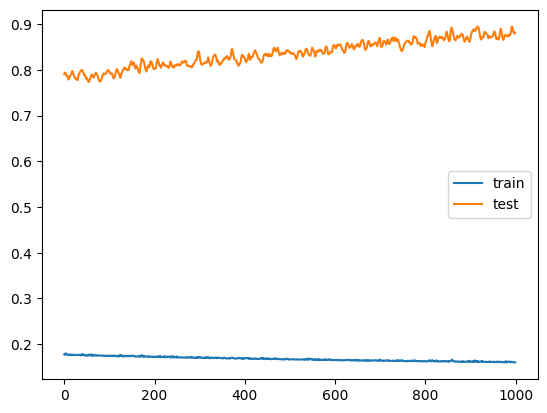

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


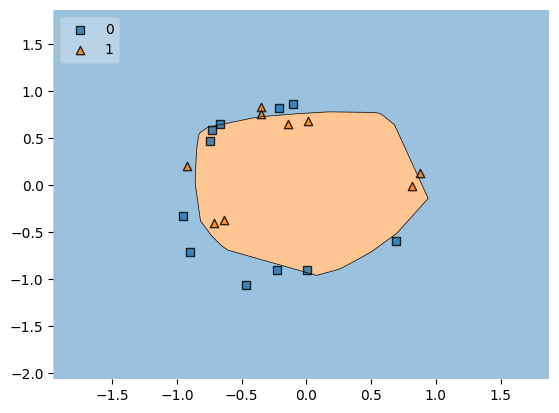

In [15]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [16]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [19]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.4680 - loss: 0.6913 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5352 - loss: 0.6858 - val_accuracy: 0.4000 - val_loss: 0.6938
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5188 - loss: 0.6889 - val_accuracy: 0.4500 - val_loss: 0.6962
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5281 - loss: 0.6873 - val_accuracy: 0.5500 - val_loss: 0.6995
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5758 - loss: 0.6792 - val_accuracy: 0.5000 - val_loss: 0.7009
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5367 - loss: 0.6851 - val_accuracy: 0.4500 - val_loss: 0.7025
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5227 - loss: 0.6828 - val_accuracy: 0.4500 - val_loss: 0.7039
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5414 - loss: 0.6856 - val_accuracy: 0.5000 - 

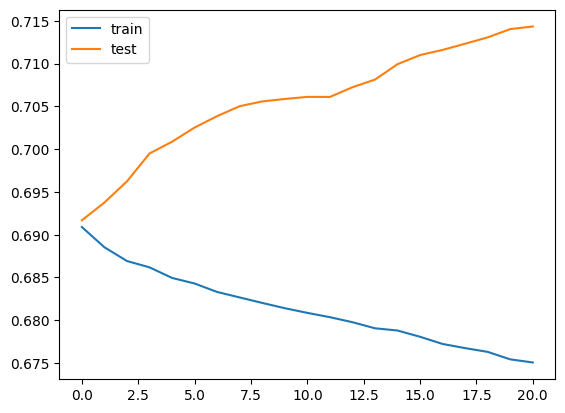

In [20]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


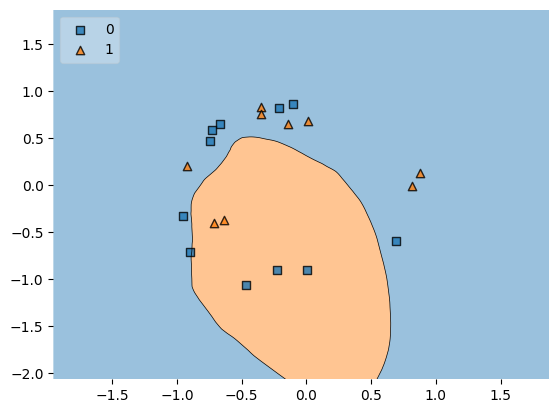

In [21]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()